In [96]:
# all regessions Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [97]:
df = pd.read_csv("Automobilepricedata.csv")

In [98]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [99]:
df.shape

(205, 26)

In [100]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [101]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [102]:
df.value_counts('price')

price
?        4
9279     2
5572     2
6229     2
6692     2
        ..
18280    1
18344    1
18399    1
18420    1
35550    1
Name: count, Length: 187, dtype: int64

In [113]:
correlated_cols = []
for i in df.price:
    if i == '?':
        correlated_cols= df.price.replace('?',1000)
print(correlated_cols)   
    


0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object


In [115]:
correlated_cols.value_counts()

price
1000     4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: count, Length: 187, dtype: int64

In [116]:
df['Newprice']=correlated_cols

In [117]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Newprice
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,22470


In [122]:
df.Newprice = pd.to_numeric(df.Newprice, errors='coerce')

In [123]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [124]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
Newprice               int64
dtype: object

In [125]:
num = ['int64', 'float64','int32']
num_vars = list(df.select_dtypes(include=num))

In [126]:
num_vars

['symboling',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'city-mpg',
 'highway-mpg',
 'Newprice']

In [127]:
df = df[num_vars]

In [228]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [230]:
for cols in df.columns:
    sum = df[cols].duplicated().sum()
    if sum > 0:
        print(f"Column {cols} has duplicates count {sum}") 

Column symboling has duplicates count 199
Column wheel-base has duplicates count 152
Column length has duplicates count 130
Column width has duplicates count 161
Column height has duplicates count 156
Column curb-weight has duplicates count 34
Column engine-size has duplicates count 161
Column compression-ratio has duplicates count 173
Column city-mpg has duplicates count 176
Column highway-mpg has duplicates count 175
Column Newprice has duplicates count 18


In [128]:
df.isna().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
city-mpg             0
highway-mpg          0
Newprice             0
dtype: int64

In [129]:
df.dropna(inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23208\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [130]:
df

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,Newprice
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28,16845
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25,19045
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23,21485
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27,22470


In [133]:
X = df.iloc[:,:10]
y = df.iloc[:, -1]

In [134]:
X

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27


In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [198]:
corr = df.corr()
sorted_corr = corr["Newprice"].sort_values(ascending=False)
print(sorted_corr)

Newprice             1.000000
engine-size          0.841345
curb-weight          0.802759
width                0.699343
length               0.686092
wheel-base           0.580161
height               0.156938
compression-ratio    0.077583
symboling           -0.072384
city-mpg            -0.661754
highway-mpg         -0.689114
Name: Newprice, dtype: float64


In [200]:
from scipy.stats import skew
skewness = skew(df["Newprice"])
print(skewness)

1.7153929982658673


C:\Users\Dell\AppData\Local\Temp\ipykernel_23208\3646314542.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Newprice"],fit=norm)



 mu = 12968.94 and sigma = 8029.09



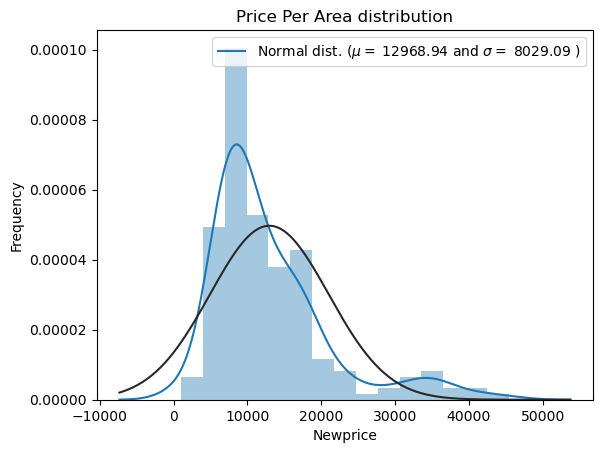

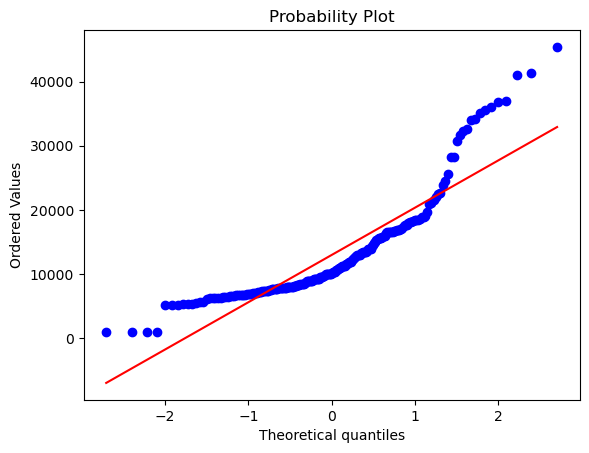

In [203]:
import seaborn as sns
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats
from scipy.special import boxcox1p
sns.distplot(df["Newprice"],fit=norm)
(mu,sigma) = norm.fit(df["Newprice"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price Per Area distribution')

fig = plt.figure()
res = stats.probplot(df["Newprice"],plot = plt)
plt.show()

In [137]:
corrmatrix = X_train.corr()

In [138]:
corrmatrix

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.569144,-0.377214,-0.283471,-0.547891,-0.281102,-0.151574,-0.203207,0.012613,0.080801
wheel-base,-0.569144,1.000000,0.865246,0.807593,0.563051,0.770854,0.552954,0.219713,-0.495869,-0.566079
length,-0.377214,0.865246,1.000000,0.847764,0.447282,0.877701,0.672723,0.136416,-0.707380,-0.739691
width,-0.283471,0.807593,0.847764,1.000000,0.265830,0.845633,0.688241,0.208793,-0.633781,-0.673286
height,-0.547891,0.563051,0.447282,0.265830,1.000000,0.274192,0.045701,0.212764,-0.057867,-0.103373
curb-weight,-0.281102,0.770854,0.877701,0.845633,0.274192,1.000000,0.834501,0.139383,-0.775215,-0.815647
engine-size,-0.151574,0.552954,0.672723,0.688241,0.045701,0.834501,1.000000,0.026752,-0.644604,-0.670615
compression-ratio,-0.203207,0.219713,0.136416,0.208793,0.212764,0.139383,0.026752,1.000000,0.280140,0.228769
city-mpg,0.012613,-0.495869,-0.707380,-0.633781,-0.057867,-0.775215,-0.644604,0.280140,1.000000,0.976643
highway-mpg,0.080801,-0.566079,-0.739691,-0.673286,-0.103373,-0.815647,-0.670615,0.228769,0.976643,1.000000


<Axes: >

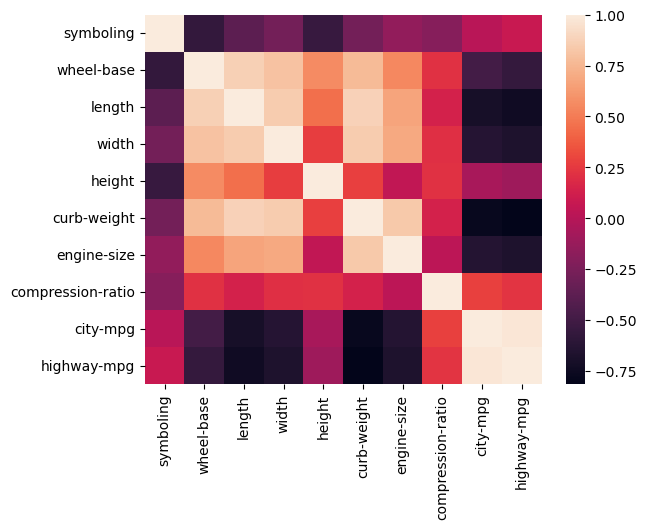

In [139]:
sns.heatmap(corrmatrix)

<Axes: >

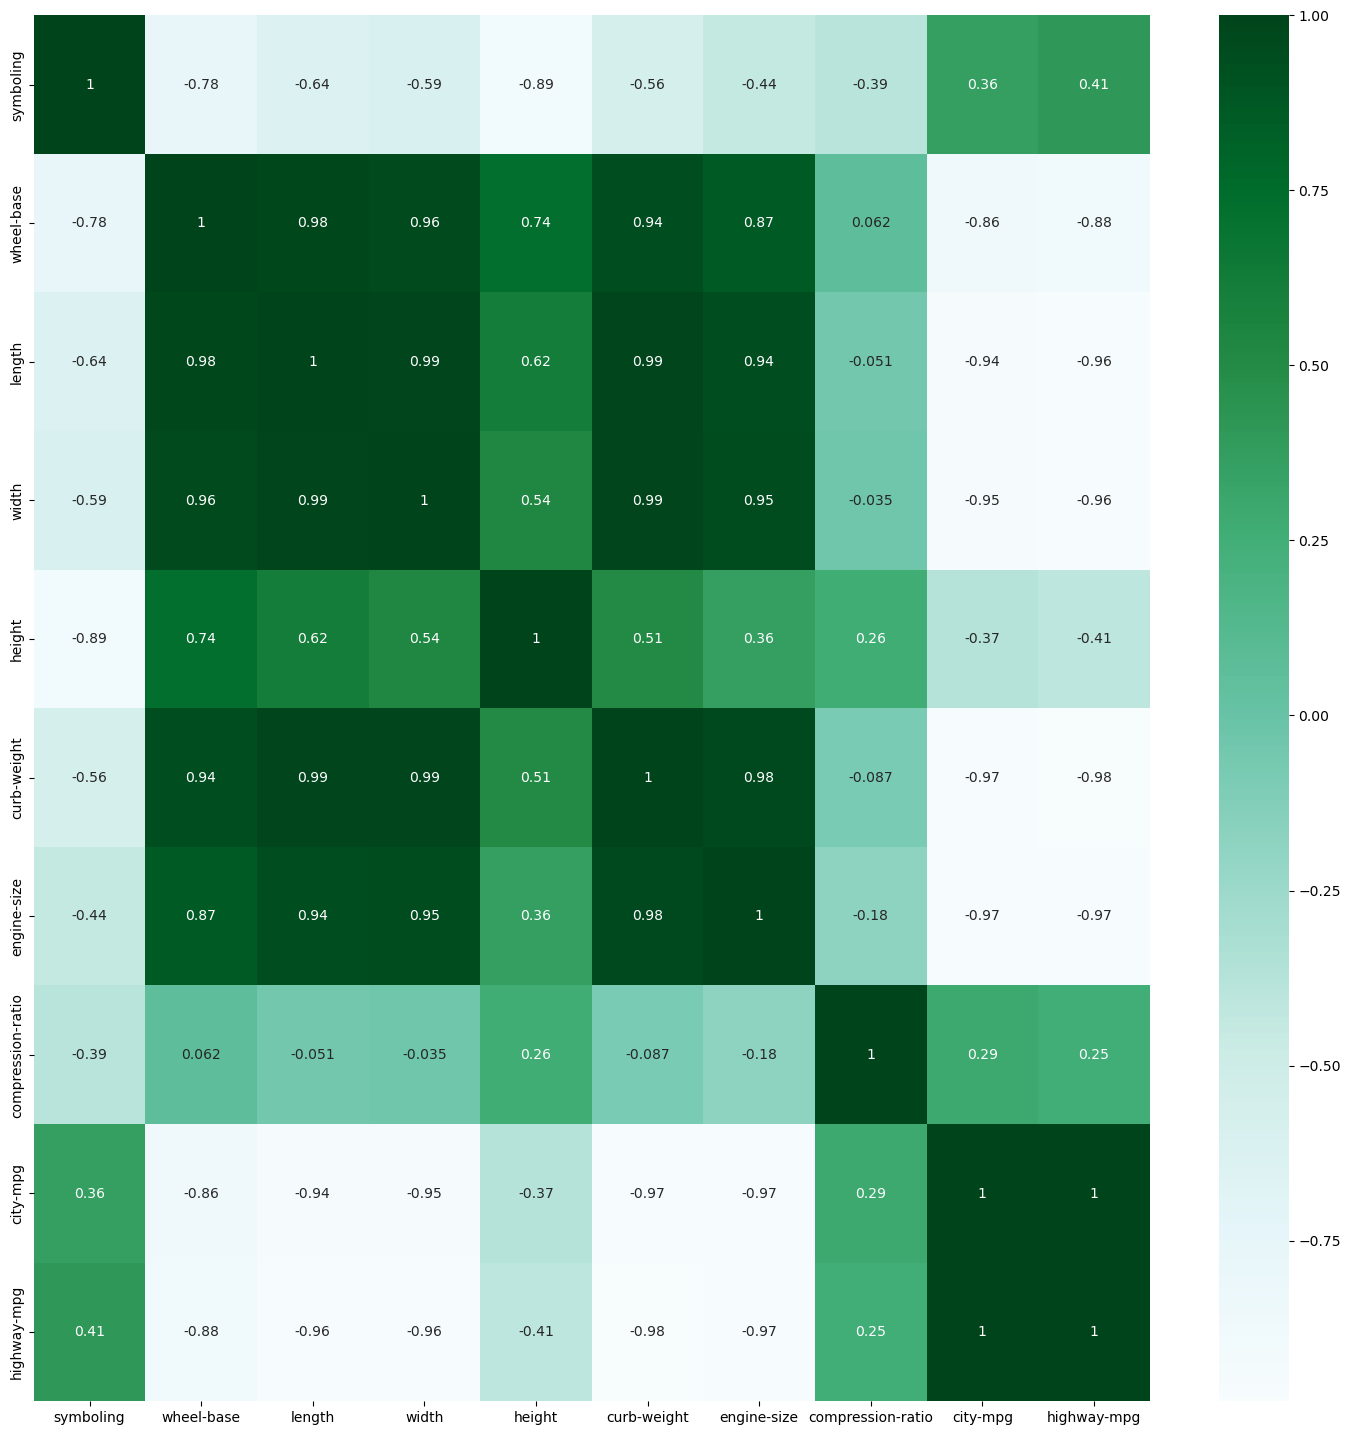

In [197]:
plt.figure(figsize=(18,18))
sns.heatmap(corrmatrix.corr(), cmap= "BuGn", annot=True)

In [140]:
def correlation(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [141]:
correlation(df,0.6)

{'Newprice',
 'city-mpg',
 'curb-weight',
 'engine-size',
 'highway-mpg',
 'length',
 'width'}

In [142]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [143]:
sel = SelectFromModel(LogisticRegression(penalty="l2", C=7, solver="liblinear"))

In [144]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=7, solver='liblinear'))

In [145]:
X_train1 = sel.transform(X_train)
X_test1 = sel.transform(X_test)

In [148]:
glm = LogisticRegression()
glm.fit(X_train1, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
y_pred = glm.predict(X_test1)

In [150]:
y_pred

array([ 1000, 23875, 22470, 10795,  7129,  7775,  8495,  7499,  7499,
        5399,  6692, 14489,  6095,  5118, 11694,  8499,  8495, 11048,
        1000,  5399, 18150, 11245,  8778,  5389, 17950, 16500,  9295,
        7689, 36880,  1000,  1000,  9988,  7295,  9988, 16925,  8495,
        7499,  1000, 10198, 13415,  6095, 13415, 17950,  7999, 11549,
        7775, 16558,  8845,  1000,  9988, 13415,  8495,  1000, 22470,
       16500,  7129,  7689, 15510,  9298,  9298, 15750,  5151],
      dtype=int64)

In [151]:
from sklearn.metrics import accuracy_score

In [152]:
accuracy_score(y_test, y_pred)

0.0

In [153]:
y_test

88      9279
72     35056
114    17075
158     7898
163     8058
       ...  
133    12170
166     9538
41     12945
180    15690
90      7099
Name: Newprice, Length: 62, dtype: int64

In [154]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [155]:
#All regression models are avaiable in the below code
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4263.6389
- Mean Absolute Error: 2998.2303
- R2 Score: 0.7596
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3586.9996
- Mean Absolute Error: 2650.4306
- R2 Score: 0.6070


Lasso
Model performance for Training set
- Root Mean Squared Error: 4263.6396
- Mean Absolute Error: 2997.7379
- R2 Score: 0.7596
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3584.9741
- Mean Absolute Error: 2649.0127
- R2 Score: 0.6074


Ridge
Model performance for Training set
- Root Mean Squared Error: 4263.6513
- Mean Absolute Error: 2996.7722
- R2 Score: 0.7596
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3579.7634
- Mean Absolute Error: 2645.0542
- R2 Score: 0.6085


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3842.9853
- Mean Absolute Error: 2402.4364


In [156]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
5,Random Forest Regressor,0.884636
6,XGBRegressor,0.870199
8,AdaBoost Regressor,0.869545
7,CatBoosting Regressor,0.805841
4,Decision Tree,0.770974
3,K-Neighbors Regressor,0.768871
2,Ridge,0.608545
1,Lasso,0.607404
0,Linear Regression,0.606960


In [157]:
from catboost import CatBoostRegressor
cata=CatBoostRegressor()
model=cata.fit(X_train, y_train)
y_pred=model.predict(X_test)

Learning rate set to 0.030111
0:	learn: 8553.1353972	total: 1.37ms	remaining: 1.37s
1:	learn: 8410.7583153	total: 2.74ms	remaining: 1.37s
2:	learn: 8273.3970402	total: 3.59ms	remaining: 1.19s
3:	learn: 8136.7108070	total: 4.69ms	remaining: 1.17s
4:	learn: 8000.5364650	total: 5.87ms	remaining: 1.17s
5:	learn: 7872.3051970	total: 7.13ms	remaining: 1.18s
6:	learn: 7768.8679516	total: 8.33ms	remaining: 1.18s
7:	learn: 7625.1945116	total: 9.43ms	remaining: 1.17s
8:	learn: 7513.9664323	total: 10.5ms	remaining: 1.16s
9:	learn: 7372.8750670	total: 11.7ms	remaining: 1.15s
10:	learn: 7244.0667258	total: 12.8ms	remaining: 1.15s
11:	learn: 7112.5306720	total: 13.9ms	remaining: 1.14s
12:	learn: 6998.4244307	total: 16.5ms	remaining: 1.25s
13:	learn: 6881.2179633	total: 17.9ms	remaining: 1.26s
14:	learn: 6766.5805188	total: 19.3ms	remaining: 1.27s
15:	learn: 6662.6789729	total: 20.8ms	remaining: 1.28s
16:	learn: 6555.9719339	total: 22.7ms	remaining: 1.31s
17:	learn: 6455.1322635	total: 24.8ms	remaini

200:	learn: 1760.7526705	total: 177ms	remaining: 703ms
201:	learn: 1756.9027231	total: 178ms	remaining: 703ms
202:	learn: 1752.3203763	total: 178ms	remaining: 701ms
203:	learn: 1744.5587840	total: 180ms	remaining: 701ms
204:	learn: 1740.7787913	total: 181ms	remaining: 700ms
205:	learn: 1731.2185159	total: 181ms	remaining: 699ms
206:	learn: 1728.1726086	total: 182ms	remaining: 698ms
207:	learn: 1723.8552086	total: 183ms	remaining: 696ms
208:	learn: 1722.1505054	total: 183ms	remaining: 694ms
209:	learn: 1717.3346108	total: 184ms	remaining: 692ms
210:	learn: 1715.8043172	total: 184ms	remaining: 690ms
211:	learn: 1710.0000027	total: 185ms	remaining: 689ms
212:	learn: 1705.8045248	total: 186ms	remaining: 689ms
213:	learn: 1704.6170129	total: 187ms	remaining: 687ms
214:	learn: 1701.6765278	total: 188ms	remaining: 686ms
215:	learn: 1696.0864152	total: 189ms	remaining: 685ms
216:	learn: 1694.6672631	total: 189ms	remaining: 683ms
217:	learn: 1692.5723694	total: 190ms	remaining: 681ms
218:	learn

417:	learn: 928.5801099	total: 335ms	remaining: 467ms
418:	learn: 926.1515619	total: 336ms	remaining: 466ms
419:	learn: 923.9530892	total: 338ms	remaining: 466ms
420:	learn: 922.4964434	total: 338ms	remaining: 466ms
421:	learn: 919.7667645	total: 339ms	remaining: 465ms
422:	learn: 917.5016981	total: 340ms	remaining: 464ms
423:	learn: 915.5455317	total: 341ms	remaining: 463ms
424:	learn: 913.2061641	total: 342ms	remaining: 462ms
425:	learn: 910.4338799	total: 343ms	remaining: 462ms
426:	learn: 907.8038822	total: 343ms	remaining: 461ms
427:	learn: 905.7583714	total: 344ms	remaining: 460ms
428:	learn: 903.8476970	total: 345ms	remaining: 459ms
429:	learn: 901.5861019	total: 346ms	remaining: 458ms
430:	learn: 900.2998264	total: 346ms	remaining: 457ms
431:	learn: 900.0007708	total: 347ms	remaining: 457ms
432:	learn: 897.9199391	total: 348ms	remaining: 456ms
433:	learn: 895.7818958	total: 349ms	remaining: 455ms
434:	learn: 893.9487599	total: 350ms	remaining: 455ms
435:	learn: 892.7067517	tota

675:	learn: 609.0927854	total: 514ms	remaining: 247ms
676:	learn: 608.2160163	total: 515ms	remaining: 246ms
677:	learn: 607.4848156	total: 516ms	remaining: 245ms
678:	learn: 606.6417270	total: 517ms	remaining: 245ms
679:	learn: 605.8264460	total: 518ms	remaining: 244ms
680:	learn: 605.0546446	total: 519ms	remaining: 243ms
681:	learn: 604.8783924	total: 519ms	remaining: 242ms
682:	learn: 604.2157863	total: 520ms	remaining: 241ms
683:	learn: 603.1835933	total: 520ms	remaining: 240ms
684:	learn: 602.0610278	total: 521ms	remaining: 240ms
685:	learn: 601.1386787	total: 522ms	remaining: 239ms
686:	learn: 599.7467491	total: 522ms	remaining: 238ms
687:	learn: 598.8030268	total: 523ms	remaining: 237ms
688:	learn: 597.6639158	total: 524ms	remaining: 236ms
689:	learn: 596.4156983	total: 524ms	remaining: 236ms
690:	learn: 595.8777869	total: 525ms	remaining: 235ms
691:	learn: 595.2712542	total: 526ms	remaining: 234ms
692:	learn: 594.2468870	total: 526ms	remaining: 233ms
693:	learn: 593.1992264	tota

924:	learn: 466.3992251	total: 692ms	remaining: 56.1ms
925:	learn: 465.7573412	total: 693ms	remaining: 55.4ms
926:	learn: 465.4575970	total: 694ms	remaining: 54.7ms
927:	learn: 465.2662507	total: 695ms	remaining: 53.9ms
928:	learn: 465.1233056	total: 696ms	remaining: 53.2ms
929:	learn: 464.8833016	total: 697ms	remaining: 52.5ms
930:	learn: 464.4340572	total: 698ms	remaining: 51.7ms
931:	learn: 464.2214913	total: 698ms	remaining: 51ms
932:	learn: 463.9093635	total: 699ms	remaining: 50.2ms
933:	learn: 463.6723875	total: 700ms	remaining: 49.5ms
934:	learn: 463.1732022	total: 701ms	remaining: 48.7ms
935:	learn: 463.0279099	total: 702ms	remaining: 48ms
936:	learn: 462.4654950	total: 703ms	remaining: 47.2ms
937:	learn: 462.1670785	total: 703ms	remaining: 46.5ms
938:	learn: 461.8741386	total: 704ms	remaining: 45.7ms
939:	learn: 461.4880197	total: 705ms	remaining: 45ms
940:	learn: 461.2029065	total: 706ms	remaining: 44.3ms
941:	learn: 460.6960315	total: 707ms	remaining: 43.5ms
942:	learn: 460.

In [164]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.head(150)

,Actual Value,Predicted Value,Difference
88,9279,9100.078114,178.921886
72,35056,23357.479514,11698.520486
114,17075,20312.367461,-3237.367461
158,7898,8946.470780,-1048.470780
163,8058,8036.315232,21.684768
...,...,...,...
133,12170,14370.313799,-2200.313799
166,9538,9587.685283,-49.685283
41,12945,10574.358931,2370.641069
180,15690,17918.124496,-2228.124496


In [159]:
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 80.58


In [184]:
import statsmodels.api as sm
# Add a constant to X for intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Newprice   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     60.90
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.98e-54
Time:                        01:02:41   Log-Likelihood:                -1988.4
No. Observations:                 205   AIC:                             3999.
Df Residuals:                     194   BIC:                             4035.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.396e+04   1.81e+0

In [185]:
X = sm.add_constant(X_train)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Newprice   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              182.5
Date:                Tue, 21 May 2024   Prob (F-statistic):                    1.53e-72
Time:                        01:05:16   Log-Likelihood:                         -1398.1
No. Observations:                 143   AIC:                                      2816.
Df Residuals:                     133   BIC:                                      2846.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [186]:
## Residuals
residuals=y_test-y_pred

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


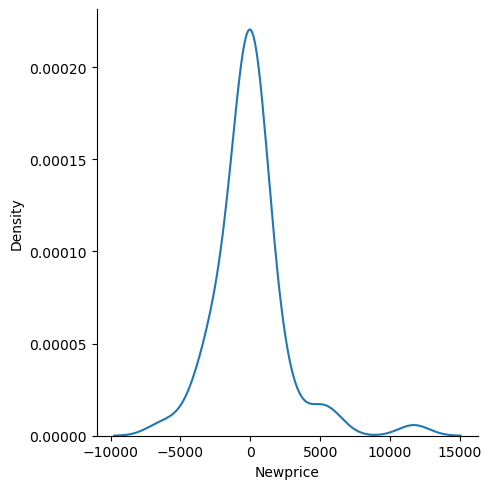

In [187]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

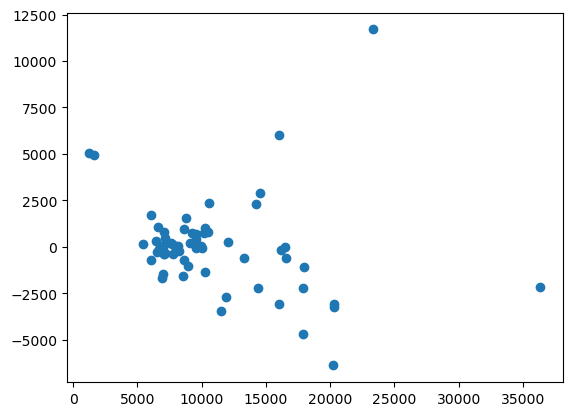

In [188]:
plt.scatter(y_pred,residuals)

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


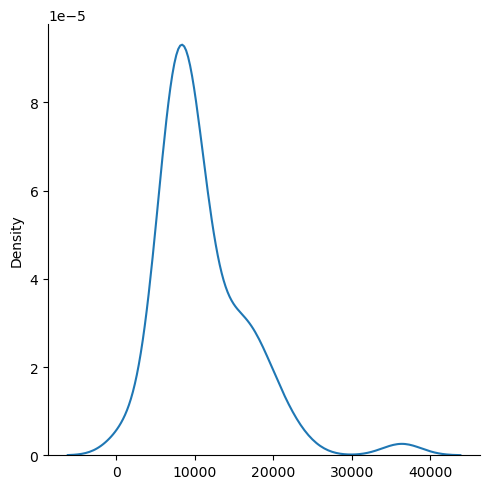

In [190]:

sns.displot(y_pred,kind="kde")

C:\Users\Dell\AppData\Local\Temp\ipykernel_23208\520176394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='Newprice', ylabel='Density'>

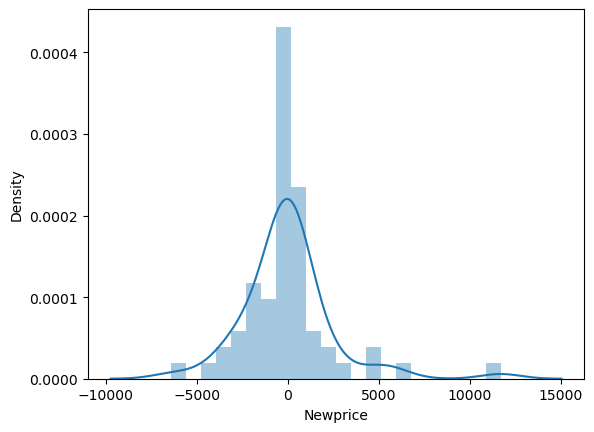

In [191]:
sns.distplot(y_test-y_pred)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23208\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='Newprice', ylabel='Density'>

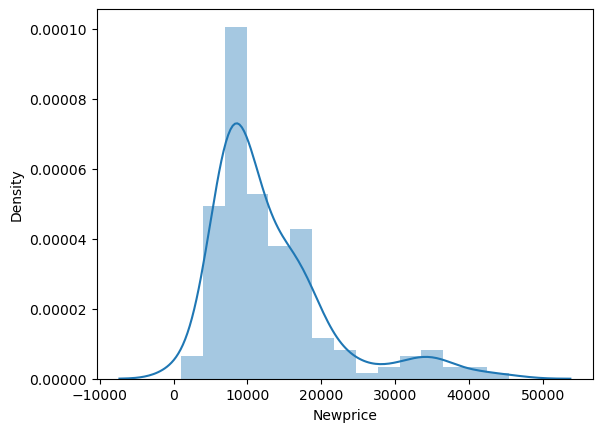

In [195]:
sns.distplot(y)

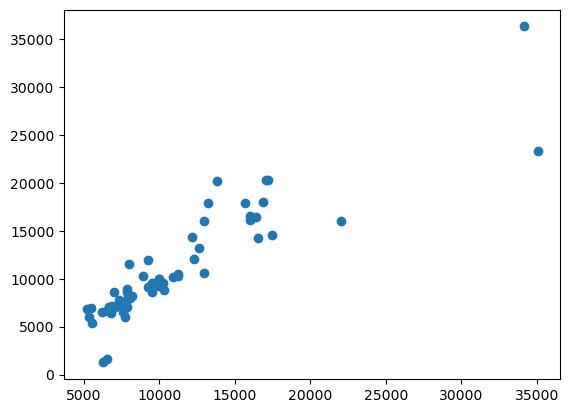

In [196]:
plt.scatter(y_test,y_pred)

In [217]:
# Importing Libraries
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


In [220]:
df
#Without scaleing
reg = LinearRegression()
def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    # Initialize the Linear Regression model
    reg = LinearRegression()

    # Train the model on the training data
    model = reg.fit(X_train, y_train)

    # Make predictions on the testing data
    predictions = model.predict(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, predictions)
    print("Mean Absolute Error: ", mae)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error: ", mse)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = sqrt(mse)
    print("Root Mean Squared Error: ", rmse)

    # Calculate R-squared
    r2 = r2_score(y_test, predictions)
    print("R-squared: ", r2)

train_and_evaluate_model(X_train,y_train,X_test,y_test)

Mean Absolute Error:  2650.4305817742697
Mean Squared Error:  12866565.911384381
Root Mean Squared Error:  3586.999569470894
R-squared:  0.6069603511989793


In [221]:
#with_scaleing _technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_and_evaluate_model(X_train_scaled,y_train,X_test_scaled,y_test)

Mean Absolute Error:  2650.430581774276
Mean Squared Error:  12866565.911384404
Root Mean Squared Error:  3586.9995694708973
R-squared:  0.6069603511989785


In [212]:
X_train_scaled

array([[ 1.71771706e+00, -1.56078180e+00, -4.88454002e-01, ...,
        -1.22351516e-01, -1.11502506e+00, -7.31998185e-01],
       [ 1.71771706e+00, -4.60996131e-01, -1.60336929e-01, ...,
        -3.87808453e-01,  9.75116976e-02,  2.92799274e-01],
       [ 9.12361191e-01, -8.81502415e-01, -1.41678523e+00, ...,
        -1.48897209e-01,  1.00691427e+00,  1.17119710e+00],
       ...,
       [-6.98350541e-01,  9.29909271e-01, -2.79820120e-04, ...,
         3.19586020e+00,  1.00691427e+00,  1.31759673e+00],
       [ 1.71771706e+00, -1.56078180e+00, -4.88454002e-01, ...,
        -1.22351516e-01, -1.11502506e+00, -7.31998185e-01],
       [-6.98350541e-01,  2.43402790e+00,  1.91240263e+00, ...,
        -4.14354147e-01, -8.11890873e-01, -8.78397822e-01]])

In [213]:
X_test_scaled

array([[-1.50370641, -0.46099613, -0.20835406, -0.2988112 , -0.87110057,
        -0.39117897, -0.45585422, -0.65326539, -0.20562249,  0.        ],
       [ 1.71771706, -0.41247618,  0.42387152,  1.96650073, -1.19266851,
         2.0358305 ,  2.31331572, -0.44089984, -1.26659216, -1.75679564],
       [-0.69835054,  2.4340279 ,  1.91240263,  1.03372523,  1.98281492,
         1.65720188,  0.48209044,  2.93040327,  0.0975117 , -0.73199819],
       [-0.69835054, -0.55803604, -0.69652824, -0.74299001, -0.30835667,
        -0.63350129, -0.45585422,  3.32858867,  1.46161555,  0.87839782],
       [ 0.10700532, -0.75211587, -0.50445971, -0.92066153, -0.46914064,
        -0.83417446, -0.72383841, -0.25507998,  0.70378008,  0.58559855],
       [-0.69835054, -0.55803604, -0.69652824, -0.74299001, -0.38874866,
        -0.63350129, -0.45585422,  3.32858867,  2.06788393,  2.48879383],
       [ 0.91236119, -0.29926294, -0.26437405, -0.25439332,  0.77693513,
        -0.75276931, -0.47818624, -0.25507998

In [222]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1, tol=1e-7, max_iter=20000))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3, max_iter=10000, tol=1e-5))
KRR = KernelRidge(alpha=0.6,kernel="polynomial",degree=2,coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [223]:
class AverageModels(BaseEstimator, RegressorMixin,TransformerMixin):
    
    def __init__(self,models):
        self.models = models
    
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X,y)
            
        return self
    
    def predict(self,X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        
        return np.mean(predictions,axis=1)

In [227]:
averaged_models = AverageModels(models=(ENet, GBoost, KRR, lasso))
averaged_models.fit(X_train_scaled,y_train)
predictions = averaged_models.predict(X_test_scaled)  # Corrected line: Removed y_train
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
r2 = r2_score(y_test,predictions)
print("Means Squared Error: ",mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ",r2)

Means Squared Error:  8057372.813198579
Root Mean Squared Error:  2838.55118206429
R2 Score:  0.7538685145228683


In [231]:
class StackingAveragedModels(BaseEstimator,RegressorMixin,TransformerMixin):
    
    def __init__(self,base_models,meta_models,n_folds = 5):
        
        self.base_models = base_models
        self.meta_models = meta_models
        self.n_folds = n_folds
    
    
    def fit(self,X,y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_models)
        kfold = KFold(n_splits = self.n_folds,shuffle=True,random_state = 42)
    
        out_of_fold_predictions = np.zeros((X.shape[0],len(self.base_models)))
        
        for i,model in enumerate(self.base_models):
            for train_index,holdout_index in kfold.split(X,y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index,i] = y_pred
        self.meta_model_.fit(out_of_fold_predictions,y)
        return self
    
    def predict(self,X):
        meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(axis=1) for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)

In [232]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet,GBoost,KRR),meta_models=lasso)
stacked_averaged_models.fit(X_train,y_train)
stacked_pred = stacked_averaged_models.predict(X_train)
mse = mean_squared_error(y_train, stacked_pred)
rmse = sqrt(mse)
r2 = r2_score(y_train,stacked_pred)
print("Means Squared Error: ",mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ",r2)

Means Squared Error:  2514353.1980962832
Root Mean Squared Error:  1585.6712137439727
R2 Score:  0.9667483318955076


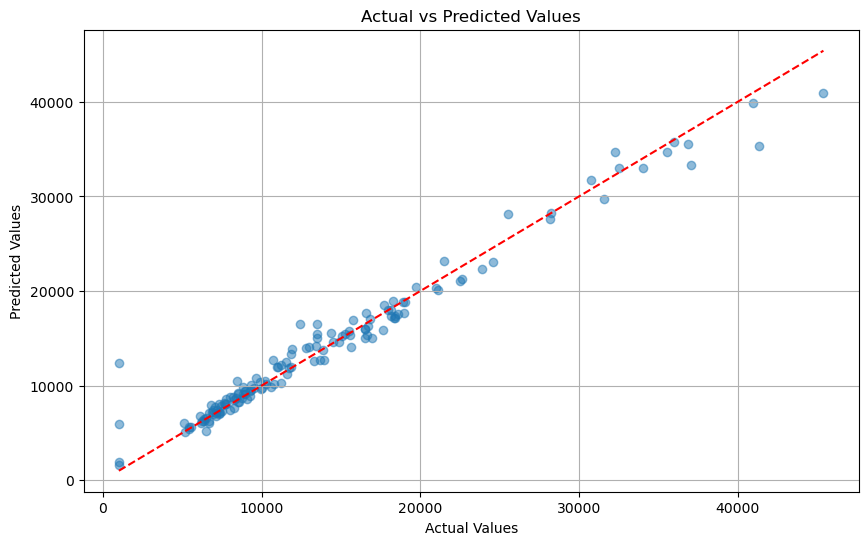

In [233]:
plt.figure(figsize=(10,  6))  # Optional: Set the figure size
plt.scatter(y_train, stacked_pred, alpha=0.5)  # Alpha makes the points semi-transparent
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)  # Optional: Add grid lines
plt.show()

In [234]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
def train_and_evaluate_model_1(X_train, y_train, X_test, y_test):
    # Initialize the Linear Regression model
    dtree = DecisionTreeRegressor()

    # Train the model on the training data
    model = dtree.fit(X_train, y_train)

    # Make predictions on the testing data
    tree_predictions = model.predict(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, tree_predictions)
    print("Mean Absolute Error: ", mae)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, tree_predictions)
    print("Mean Squared Error: ", mse)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = sqrt(mse)
    print("Root Mean Squared Error: ", rmse)

    # Calculate R-squared
    r2 = r2_score(y_test, tree_predictions)
    print("R-squared: ", r2)

train_and_evaluate_model_1(X_train,y_train,X_test,y_test)

dtree.get_params()

Mean Absolute Error:  1744.9032258064517
Mean Squared Error:  6720556.354838709
Root Mean Squared Error:  2592.403586411404
R-squared:  0.7947047310334675


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [235]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [236]:
from sklearn.ensemble import RandomForestRegressor
def train_and_evaluate_model_1(X_train, y_train, X_test, y_test):
    # Initialize the Linear Regression model
    dforest = RandomForestRegressor()
    # Train the model on the training data
    model = dforest.fit(X_train, y_train)

    # Make predictions on the testing data
    random_predictions = model.predict(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, random_predictions)
    print("Mean Absolute Error: ", mae)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, random_predictions)
    print("Mean Squared Error: ", mse)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = sqrt(mse)
    print("Root Mean Squared Error: ", rmse)

    # Calculate R-squared
    r2 = r2_score(y_test, random_predictions)
    print("R-squared: ", r2)

train_and_evaluate_model_1(X_train,y_train,X_test,y_test)

Mean Absolute Error:  1286.4171774193549
Mean Squared Error:  3724794.9532409054
Root Mean Squared Error:  1929.9727856218349
R-squared:  0.8862173395480549


In [238]:
from sklearn.ensemble import RandomForestRegressor
dforest = RandomForestRegressor()
    # Train the model on the training data
model = dforest.fit(X_train, y_train)

    # Make predictions on the testing data
random_predictions = model.predict(X_test)

print(model.feature_importances_)



[0.00420036 0.02778628 0.05447032 0.03624288 0.01367085 0.22254343
 0.4655844  0.01578539 0.03675651 0.12295958]


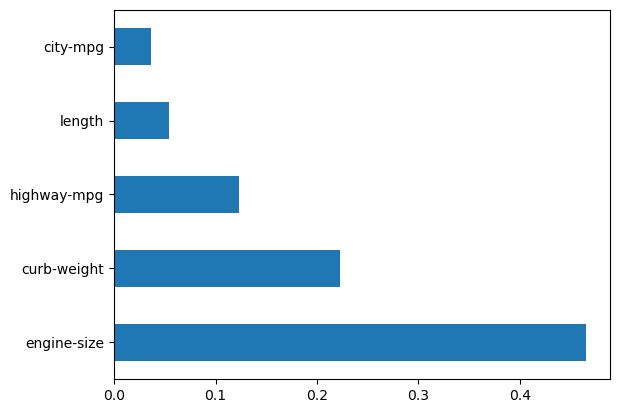

In [252]:
df1= df.iloc[:,:10]
feat_importances = pd.Series(model.feature_importances_,index=df1.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

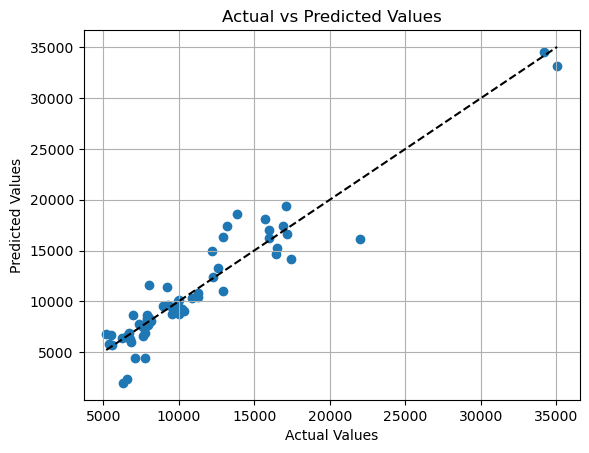

In [262]:
plt.scatter(y_test,random_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')  # Add a diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)  # Optional: Add grid lines
plt.show()

In [267]:
print(model.feature_importances_)

[0.00420036 0.02778628 0.05447032 0.03624288 0.01367085 0.22254343
 0.4655844  0.01578539 0.03675651 0.12295958]
